In [2]:
import pandas as pd
import re
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from textblob import Word
import nltk
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
from collections import Counter
import itertools
import string
from pythainlp.corpus import thai_stopwords
from pythainlp import word_tokenize
import re
import string
import pythainlp
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer


In [44]:
df = pd.read_csv ('data_tag/datatestv5.csv')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14541 entries, 0 to 14540
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Job_Title        14541 non-null  object 
 1   Company          14541 non-null  object 
 2   Location         14541 non-null  object 
 3   Job_Position     14541 non-null  object 
 4   Job_Type         14541 non-null  object 
 5   Salary Min       1894 non-null   float64
 6   Salary Max       1894 non-null   float64
 7   Job_Description  14541 non-null  object 
 8   Tag              14541 non-null  object 
 9   Language         14541 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.1+ MB


In [47]:
df['Job_Description'] = df['Job_Description'].apply(lambda x : re.sub('\\\n',' ', x))
df['R_word_count'] = df['Job_Description'].apply(lambda x : len(x.split()))
df['R_char_count'] = df['Job_Description'].apply(lambda x : len(x.replace(' ','')))
df['R_punc_count'] = df['Job_Description'].apply(lambda x : len([a for a in x if a in string.punctuation]))
                                                           
df_stats_raw = df[['Job_Position','R_word_count','R_char_count','R_punc_count']]
df_stats_raw

,Job_Position,R_word_count,R_char_count,R_punc_count
0,Financial Accounting & Reporting,108,1490,27
1,Taxation,513,2969,99
2,Accounts Receivable/Credit Control,269,1579,12
3,Business Services & Corporate Advisory,262,1531,17
4,Taxation,264,1523,28
...,...,...,...,...
14536,Food Technology & Safety,184,1053,46
14537,Food Technology & Safety,89,1327,13
14538,"Mathematics, Statistics & Information Sciences",504,3039,88
14539,Food Technology & Safety,365,2319,88


In [48]:
# Function to count sentences, handling Thai and English
def count_sentences(text):
    sentences = re.split(r"(?<=[.!?])\s+", text)  # Split on punctuation followed by whitespace
    thai_sentences = pythainlp.tokenize.sent_tokenize(text)  # Tokenize Thai sentences
    return len(sentences) + len(thai_sentences) - max(len(sentences), len(thai_sentences))  # Avoid double-counting

# Apply the sentence count function and other calculations
df['Job_Description'] = df['Job_Description'].apply(lambda x: re.sub('\\\n', ' ', x))  # Remove newlines
df['R_sentence_count'] = df['Job_Description'].apply(count_sentences)  # Count sentences
df['R_word_count'] = df['Job_Description'].apply(lambda x: len(x.split()))  # Count words
df['R_char_count'] = df['Job_Description'].apply(lambda x: len(x.replace(' ', '')))  # Count characters
df['R_punc_count'] = df['Job_Description'].apply(lambda x: len([a for a in x if a in string.punctuation]))  # Count punctuation

df_stats_raw = df[['Job_Position', 'R_sentence_count', 'R_word_count', 'R_char_count', 'R_punc_count']]


In [ ]:
df_stats_raw

,Job_Position,R_sentence_count,R_word_count,R_char_count,R_punc_count
0,Financial Accounting & Reporting,9,108,1490,27
1,Taxation,7,513,2969,99
2,Accounts Receivable/Credit Control,1,269,1579,12
3,Business Services & Corporate Advisory,1,262,1531,17
4,Taxation,3,264,1523,28
...,...,...,...,...,...
14536,Food Technology & Safety,2,184,1053,46
14537,Food Technology & Safety,2,89,1327,13
14538,"Mathematics, Statistics & Information Sciences",5,504,3039,88
14539,Food Technology & Safety,5,365,2319,88


In [ ]:
df

,Job_Title,Company,Location,Job_Position,Job_Type,Salary Min,Salary Max,Job_Description,Tag,Language,R_sentence_count,R_word_count,R_char_count,R_punc_count,Job_Description_Cleaned,C_sentence_count,C_word_count,C_char_count,C_punc_count
0,GL Account Assistant Manager,"MEGA CLINIC Co., Ltd.",Bangkok,Financial Accounting & Reporting,Full time,36000.0,53000.0,u ร่วมเป็นส่วนหนึ่งกับทีม mega clinic mega cli...,Accounting,th,9,108,1490,27,u ร่วมเป็นส่วนหนึ่งกับทีม mega clinic mega cli...,1,90,1404,0
1,Tax Associate,PKF Holdings (Thailand) Limited,Bangkok,Taxation,Full time,NaN,NaN,position summary position lawyer assist client...,Accounting,en,7,513,2969,99,position summary position lawyer assist client...,1,341,2264,0
2,Accounts Receivable Supervisor/หัวหน้าหน่วยบัญ...,Sodexo Services (Thailand) Ltd.,Bangkok,Accounts Receivable/Credit Control,Full time,NaN,NaN,report finance manager key result area positio...,Accounting,en,1,269,1579,12,report finance manager key result area positio...,1,190,1306,0
3,Assistant Accounting Manager,Mazars Holding (Thailand) Ltd.,Bangkok,Business Services & Corporate Advisory,Full time,NaN,NaN,job description prepare management report use ...,Accounting,en,1,262,1531,17,job description prepare management report use ...,1,174,1249,0
4,Assistant Tax Manager - M&A and tax advisory,Mazars Holding (Thailand) Ltd.,Bangkok,Taxation,Full time,NaN,NaN,job description ideal candidate assigned work ...,Accounting,en,3,264,1523,28,job description ideal candidate assigned work ...,1,178,1234,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14536,Foodscience (RD/Production/QA/Marketing)/เจ้าห...,"C.P. RETAILING AND MARKETING CO., LTD.",Pathum Thani,Food Technology & Safety,Full time,NaN,NaN,bachelor degree science program food science t...,Science & Technology,en,2,184,1053,46,bachelor degree science program food science t...,1,115,818,0
14537,Chef Specialist (Bakery)/เชฟเบเกอรี่,"Rich Products Manufacturing (Thailand) Co., Ltd.",Bangkok,Food Technology & Safety,Full time,NaN,NaN,หน้าที่รับผิดชอบ ให้คำแนะนำเกี่ยวกับเบเกอรี่ แ...,Science & Technology,th,2,89,1327,13,หน้าที่รับผิดชอบ ให้คำแนะนำเกี่ยวกับเบเกอรี่ แ...,1,82,1279,0
14538,Data Engineer – Advanced Analytics,Hanesbrands ROH Asia Ltd.,Bangkok,"Mathematics, Statistics & Information Sciences",Full time,NaN,NaN,overview hanesbrands inc leading apparel compa...,Science & Technology,en,5,504,3039,88,overview hanesbrands inc leading apparel compa...,1,342,2445,0
14539,R&D Manager/ผู้จัดการ วิจัยและพัฒนาผลิตภัณฑ์,Tyson International APAC Ltd.,Samut Prakan,Food Technology & Safety,Full time,NaN,NaN,purpose research development manager position ...,Science & Technology,en,5,365,2319,88,purpose research development manager position ...,1,269,1898,0


In [ ]:
df['Job_Description_Cleaned'] = df['Job_Description']

In [ ]:
## Lower case
df['Job_Description_Cleaned'] = df['Job_Description_Cleaned'].apply(lambda x: " ".join(x.lower() for x in x.split()))

## Remove tabulation, punctuation and handle Thai characters
df['Job_Description_Cleaned'] = df['Job_Description_Cleaned'].str.replace('[^\w\sก-๙]', ' ', regex=True)

## Digits
df['Job_Description_Cleaned'] = df['Job_Description_Cleaned'].str.replace('\d+', '', regex=True)

## Remove stop words (English and Thai)
stop_words = set(stopwords.words('english')).union(set(thai_stopwords()))
df['Job_Description_Cleaned'] = df['Job_Description_Cleaned'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

## English Lemmatization
df['Job_Description_Cleaned'] = df['Job_Description_Cleaned'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

## Tokenization for Thai Language (if needed)
# df['Job_description_cleaned'] = df['Job_description_cleaned'].apply(lambda x: " ".join(word_tokenize(x, engine='newmm')))

print("Preprocessed data: \n")
df.head()

<>:5: SyntaxWarning: invalid escape sequence '\w'
<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\w'
<>:8: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Tokyo\AppData\Local\Temp\ipykernel_12624\2863076896.py:5: SyntaxWarning: invalid escape sequence '\w'
  df['Job_Description_Cleaned'] = df['Job_Description_Cleaned'].str.replace('[^\w\sก-๙]', ' ', regex=True)
C:\Users\Tokyo\AppData\Local\Temp\ipykernel_12624\2863076896.py:8: SyntaxWarning: invalid escape sequence '\d'
  df['Job_Description_Cleaned'] = df['Job_Description_Cleaned'].str.replace('\d+', '', regex=True)


Preprocessed data: 



,Job_Title,Company,Location,Job_Position,Job_Type,Salary Min,Salary Max,Job_Description,Tag,Language,R_sentence_count,R_word_count,R_char_count,R_punc_count,Job_Description_Cleaned
0,GL Account Assistant Manager,"MEGA CLINIC Co., Ltd.",Bangkok,Financial Accounting & Reporting,Full time,36000.0,53000.0,About us ร่วมเป็นส่วนหนึ่งกับทีม MEGA CLINIC M...,Accounting,th,9,108,1490,27,u ร่วมเป็นส่วนหนึ่งกับทีม mega clinic mega cli...
1,Tax Associate,PKF Holdings (Thailand) Limited,Bangkok,Taxation,Full time,NaN,NaN,Position Summary This position is for a lawyer...,Accounting,en,7,513,2969,99,position summary position lawyer assist client...
2,Accounts Receivable Supervisor/หัวหน้าหน่วยบัญ...,Sodexo Services (Thailand) Ltd.,Bangkok,Accounts Receivable/Credit Control,Full time,NaN,NaN,Reports To: FINANCE MANAGER Key Result Areas: ...,Accounting,en,1,269,1579,12,report finance manager key result area positio...
3,Assistant Accounting Manager,Mazars Holding (Thailand) Ltd.,Bangkok,Business Services & Corporate Advisory,Full time,NaN,NaN,Job Description Prepare management reports for...,Accounting,en,1,262,1531,17,job description prepare management report use ...
4,Assistant Tax Manager - M&A and tax advisory,Mazars Holding (Thailand) Ltd.,Bangkok,Taxation,Full time,NaN,NaN,Job Description: The ideal candidate will be a...,Accounting,en,3,264,1523,28,job description ideal candidate assigned work ...


In [67]:
df.to_csv(f'data_tag/datatestv5.2.csv',index=False)

In [2]:
df = pd.read_csv ('data_tag/datatestv5.2.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14541 entries, 0 to 14540
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Job_Title                14541 non-null  object 
 1   Company                  14541 non-null  object 
 2   Location                 14541 non-null  object 
 3   Job_Position             14541 non-null  object 
 4   Job_Type                 14541 non-null  object 
 5   Salary Min               1894 non-null   float64
 6   Salary Max               1894 non-null   float64
 7   Job_Description          14541 non-null  object 
 8   Tag                      14541 non-null  object 
 9   Language                 14541 non-null  object 
 10  R_sentence_count         14541 non-null  int64  
 11  R_word_count             14541 non-null  int64  
 12  R_char_count             14541 non-null  int64  
 13  R_punc_count             14541 non-null  int64  
 14  Job_Description_Cleane

In [ ]:
## Remove stop words (English, Thai, and Custom)
stop_words = set(stopwords.words('english')).union(set(thai_stopwords()))
df['Job_Description_Cleaned'] = df['Job_Description_Cleaned'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [ ]:
df['Job_Description'] = df['Job_Description_Cleaned'].apply(lambda x : re.sub('\\\n',' ', x))
df['C_sentence_count'] = df['Job_Description_Cleaned'].apply(count_sentences) 
df['C_word_count'] = df['Job_Description_Cleaned'].apply(lambda x : len(x.split()))
df['C_char_count'] = df['Job_Description_Cleaned'].apply(lambda x : len(x.replace(' ','')))
df['C_punc_count'] = df['Job_Description_Cleaned'].apply(lambda x : len([a for a in x if a in string.punctuation]))

df_stats_clean = df[['Job_Position','C_sentence_count','C_word_count','C_char_count','C_punc_count']]
df_stats_clean

,Job_Position,C_sentence_count,C_word_count,C_char_count,C_punc_count
0,Financial Accounting & Reporting,1,90,1404,0
1,Taxation,1,341,2264,0
2,Accounts Receivable/Credit Control,1,190,1306,0
3,Business Services & Corporate Advisory,1,174,1249,0
4,Taxation,1,178,1234,0
...,...,...,...,...,...
14536,Food Technology & Safety,1,115,818,0
14537,Food Technology & Safety,1,82,1279,0
14538,"Mathematics, Statistics & Information Sciences",1,342,2445,0
14539,Food Technology & Safety,1,269,1898,0


In [6]:
descriptions = ''.join(d for d in df['Job_Description_Cleaned']) #Looping over all cells in Job Description column and joining then together
print ('There are {} words in the combined data-related job descriptions.'.format(len(descriptions))) #Printing results

There are 20401035 words in the combined data-related job descriptions.


In [7]:
word_count = dict(Counter(descriptions.split()))
print('Without ranking the first 10 words look like: {}'.format(dict(itertools.islice(word_count.items(), 10))))

Without ranking the first 10 words look like: {'u': 4344, 'ร่วมเป็นส่วนหนึ่งกับทีม': 1, 'mega': 27, 'clinic': 138, 'เป็นคลินิกเวชกรรมประเภทเสริมความงามที่มีมาตรฐานและการบริการระดับสากล': 1, 'ในปัจจุบัน': 5, 'มีสาขาทั้งหมด': 1, 'สาขา': 553, 'สยามสแควร์': 3, 'เซ็นทรัลลาดพร้าว': 2}


In [8]:
words_popular = {k: v for k, v in sorted(word_count.items(), key=lambda item: item[1], reverse=True)} 
print('With ranking the first 10 words look like: {}'.format(dict(itertools.islice(words_popular.items(), 10))))

With ranking the first 10 words look like: {'experience': 21500, 'team': 17488, 'business': 16630, 'skill': 15996, 'work': 15934, 'management': 14807, 'customer': 14793, 'sale': 12622, 'year': 11668, 'related': 11108}


In [9]:
words_all_jobs = pd.DataFrame.from_dict(words_popular, orient='index',columns=['Count']).reset_index()
words_all_jobs.head(5)

,index,Count
0,experience,21500
1,team,17488
2,business,16630
3,skill,15996
4,work,15934


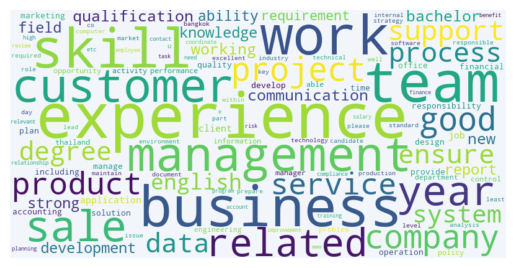

In [10]:
wordcloud = WordCloud(min_font_size=8, max_font_size=100, max_words=500, width=800, height=400,prefer_horizontal=1, background_color='#f2f6fa').generate_from_frequencies(words_popular) #Generate wordcloud class from dictionary

plt.imshow(wordcloud.recolor(), interpolation='bilinear')
plt.axis('off')
plt.show();

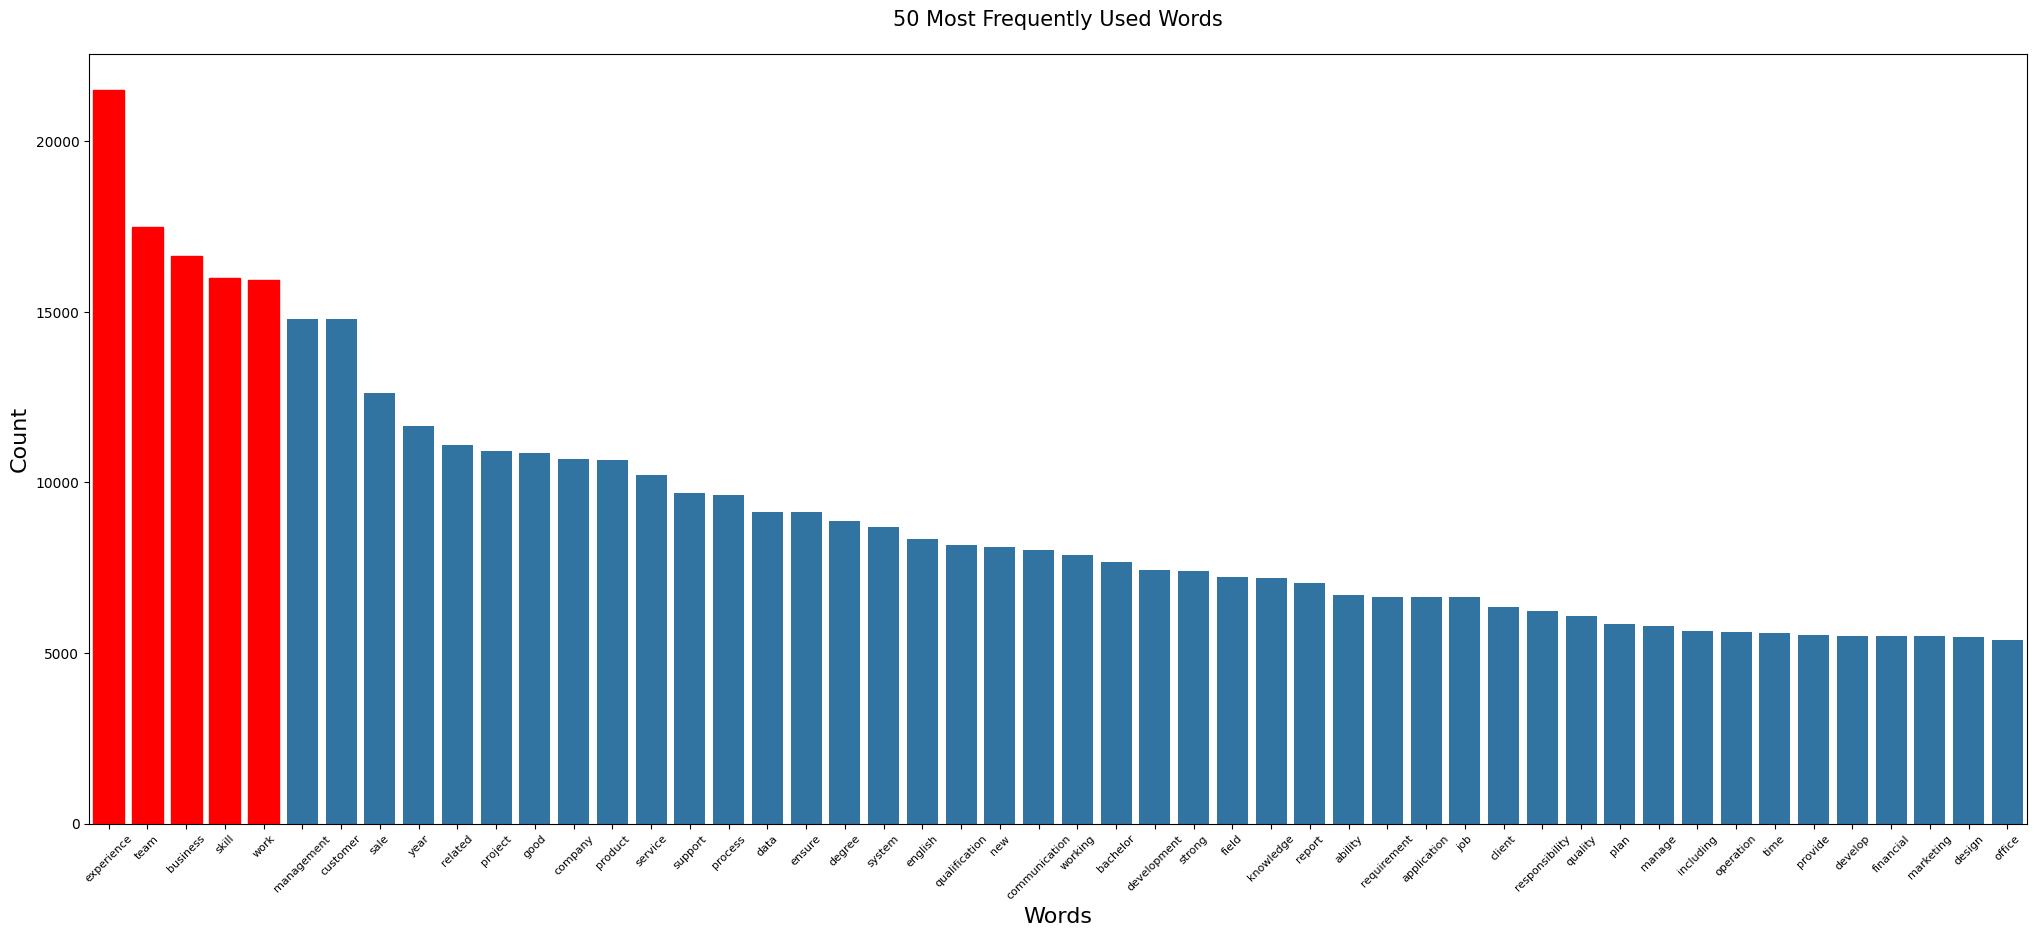

In [11]:
fig, ax = plt.subplots(figsize=(25, 10))
ax = sns.barplot(data=words_all_jobs[:50],x='index',y='Count')

for bar in ax.patches:
    if bar.get_x() < 4:
        bar.set_color('red')
plt.xticks(rotation=45, fontsize=8) 
plt.xlabel('Words', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('50 Most Frequently Used Words', fontsize=15, pad=20);

In [91]:
unique_position = []
for u in df['Job_Position'].unique():
    unique_position.append(u)
len(unique_position)

158

In [17]:
df = pd.read_csv ('data_tag/datatestv5.2.csv')

In [33]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

def get_top_n_words(tfidf_matrix, feature_names, n=20):
    top_words = []
    for row in tfidf_matrix:
        # Convert the row to dense format and sort
        dense_row = row.toarray().ravel()
        sorted_indices = dense_row.argsort()[::-1]
        top_n_words = [feature_names[i] for i in sorted_indices[:n]]
        top_words.append(top_n_words)
    return top_words

# Initialize the English TF-IDF Vectorizer
vectorizer_eng = TfidfVectorizer(max_features=20)

# TF-IDF for English job descriptions
tfidf_matrix_eng = vectorizer_eng.fit_transform(df['Job_Description_Cleaned'])
feature_names_eng = vectorizer_eng.get_feature_names_out()

# Extract top words for each job description
top_words_eng = get_top_n_words(tfidf_matrix_eng, feature_names_eng)

# Add top words to the DataFrame
df['Top_Words'] = top_words_eng

# Creating the dictionary mapping job positions to top words
skills_dict = pd.Series(df['Top_Words'].values, index=df['Job_Position']).to_dict()

# Print the resulting dictionary
print(skills_dict)


{'Financial Accounting & Reporting': ['year', 'work', 'company', 'customer', 'data', 'ensure', 'experience', 'good', 'job', 'management', 'process', 'product', 'project', 'related', 'sale', 'service', 'skill', 'support', 'team', 'business'], 'Taxation': ['business', 'data', 'good', 'process', 'sale', 'service', 'support', 'management', 'job', 'team', 'related', 'work', 'year', 'experience', 'skill', 'project', 'product', 'ensure', 'customer', 'company'], 'Accounts Receivable/Credit Control': ['year', 'work', 'company', 'customer', 'data', 'ensure', 'experience', 'good', 'job', 'management', 'process', 'product', 'project', 'related', 'sale', 'service', 'skill', 'support', 'team', 'business'], 'Business Services & Corporate Advisory': ['year', 'work', 'company', 'customer', 'data', 'ensure', 'experience', 'good', 'job', 'management', 'process', 'product', 'project', 'related', 'sale', 'service', 'skill', 'support', 'team', 'business'], 'Accounts Officers/Clerks': ['process', 'sale', 'bu

In [39]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

def get_top_n_words(tfidf_matrix, feature_names, n=20):
    top_words = []
    for row in tfidf_matrix:
        # Convert the row to dense format and sort
        dense_row = row.toarray().ravel()
        sorted_indices = dense_row.argsort()[::-1]
        top_n_words = [feature_names[i] for i in sorted_indices[:n]]
        top_words.append(top_n_words)
    return top_words

# Initialize the English TF-IDF Vectorizer
vectorizer_eng = TfidfVectorizer(max_features=30)

# TF-IDF for English job descriptions
tfidf_matrix_eng = vectorizer_eng.fit_transform(df['Job_Description_Cleaned'])
feature_names_eng = vectorizer_eng.get_feature_names_out()

# Extract top words for each job description
top_words_eng = get_top_n_words(tfidf_matrix_eng, feature_names_eng)

# Add top words to the DataFrame
df['Top_Words'] = top_words_eng

# Creating the dictionary mapping job positions to top words
skills_dict = pd.Series(df['Top_Words'].values, index=df['Job_Position']).to_dict()

# Print the resulting dictionary
print(skills_dict)


{'Financial Accounting & Reporting': ['year', 'working', 'business', 'communication', 'company', 'customer', 'data', 'degree', 'development', 'english', 'ensure', 'experience', 'good', 'job', 'management', 'new', 'process', 'product', 'project', 'qualification'], 'Taxation': ['business', 'data', 'good', 'process', 'sale', 'system', 'new', 'service', 'support', 'working', 'management', 'job', 'team', 'related', 'work', 'qualification', 'year', 'experience', 'product', 'project'], 'Accounts Receivable/Credit Control': ['year', 'working', 'business', 'communication', 'company', 'customer', 'data', 'degree', 'development', 'english', 'ensure', 'experience', 'good', 'job', 'management', 'new', 'process', 'product', 'project', 'qualification'], 'Business Services & Corporate Advisory': ['year', 'working', 'business', 'communication', 'company', 'customer', 'data', 'degree', 'development', 'english', 'ensure', 'experience', 'good', 'job', 'management', 'new', 'process', 'product', 'project', 

{'Financial Accounting & Reporting': ['year',
  'working',
  'business',
  'communication',
  'company',
  'customer',
  'data',
  'degree',
  'development',
  'english',
  'ensure',
  'experience',
  'good',
  'job',
  'management',
  'new',
  'process',
  'product',
  'project',
  'qualification'],
 'Taxation': ['business',
  'data',
  'good',
  'process',
  'sale',
  'system',
  'new',
  'service',
  'support',
  'working',
  'management',
  'job',
  'team',
  'related',
  'work',
  'qualification',
  'year',
  'experience',
  'product',
  'project'],
 'Accounts Receivable/Credit Control': ['year',
  'working',
  'business',
  'communication',
  'company',
  'customer',
  'data',
  'degree',
  'development',
  'english',
  'ensure',
  'experience',
  'good',
  'job',
  'management',
  'new',
  'process',
  'product',
  'project',
  'qualification'],
 'Business Services & Corporate Advisory': ['year',
  'working',
  'business',
  'communication',
  'company',
  'customer',
  'data',


In [3]:
df = pd.read_csv ('data_tag/datatestv5.csv')

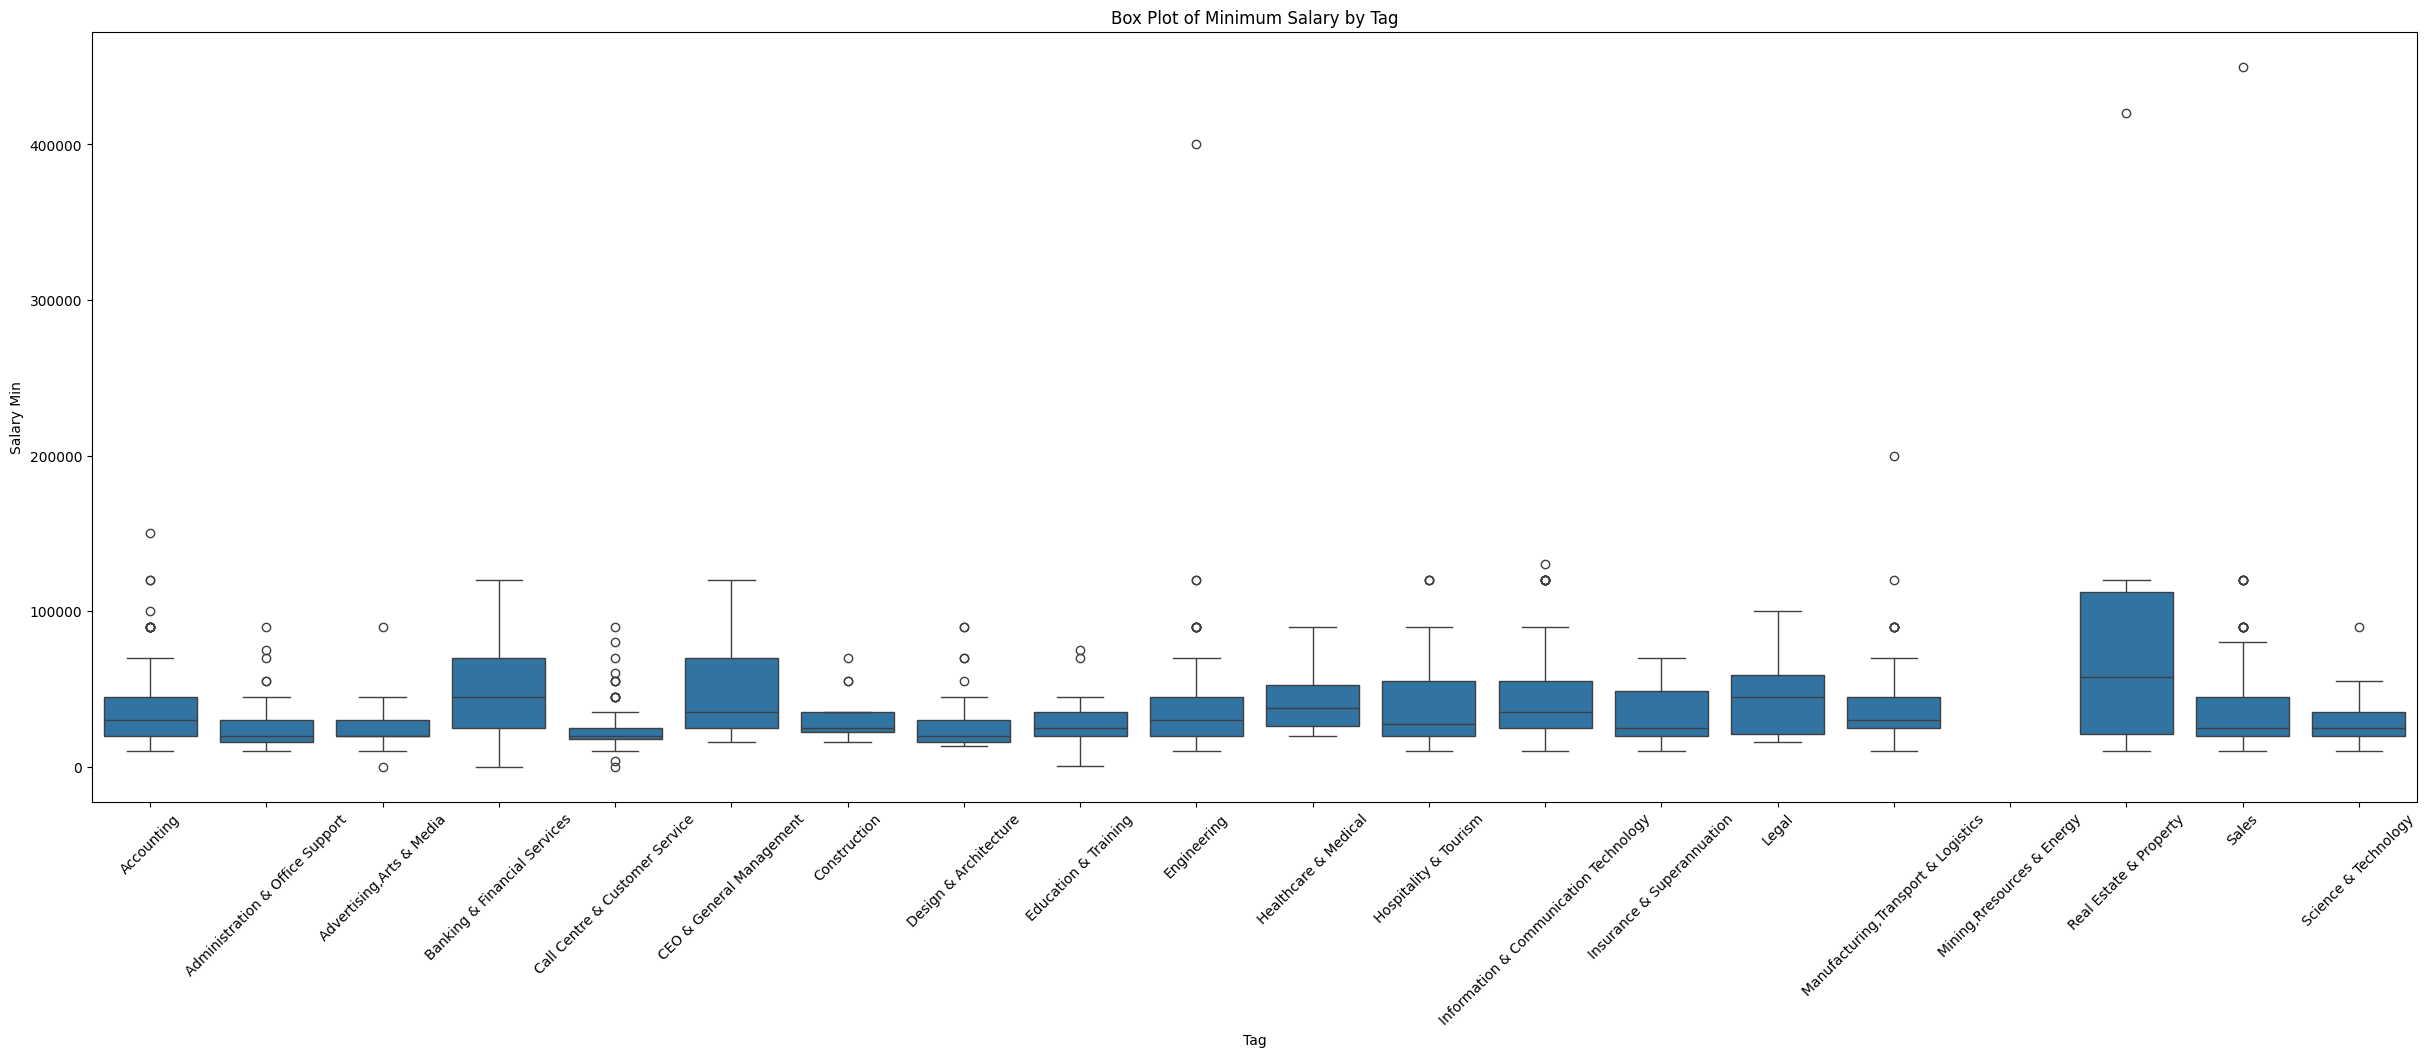

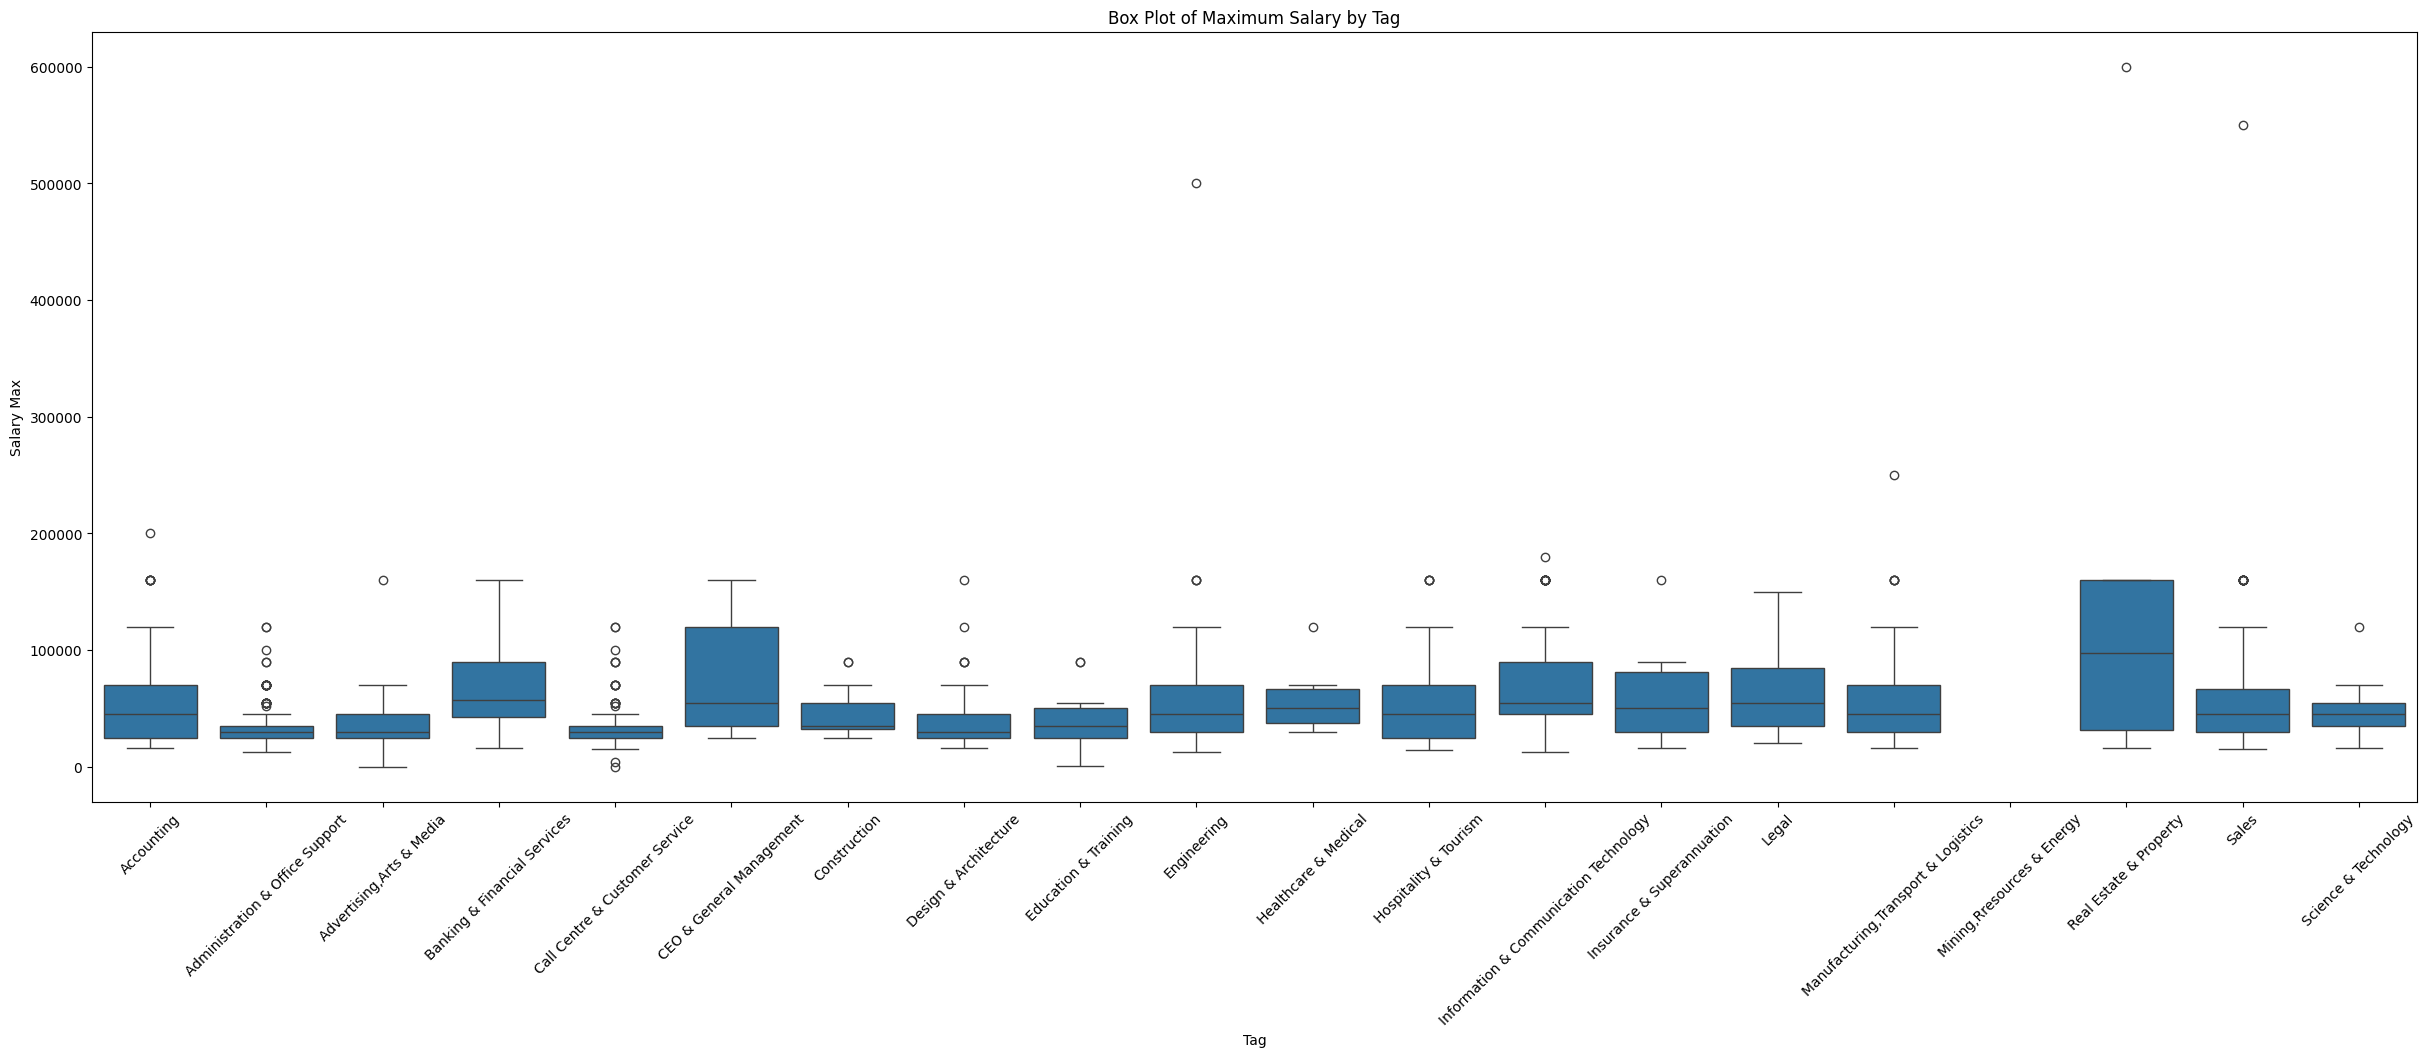

In [8]:
# Creating a box plot of salaries categorized by 'Tag'
plt.figure(figsize=(30, 10))
sns.boxplot(x='Tag', y='Salary Min', data=df)
plt.xticks(rotation=45)
plt.title('Box Plot of Minimum Salary by Tag')
plt.show()

plt.figure(figsize=(30, 10))
sns.boxplot(x='Tag', y='Salary Max', data=df)
plt.xticks(rotation=45)
plt.title('Box Plot of Maximum Salary by Tag')
plt.show()
